<a href="https://colab.research.google.com/github/leonardo-ods/tumor_classification_ml/blob/main/Classifica%C3%A7%C3%A3o_de_Tumores_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICAÇÃO DE TUMORES COM MACHINE LEARNING

### **Importando Bibliotecas Necessárias**

Nesta seção, importamos todas as bibliotecas que serão utilizadas ao longo do projeto. Isso inclui:

*   `load_breast_cancer` do `sklearn.datasets` para carregar o conjunto de dados.
*   `pandas` para manipulação e análise de dados.
*   `seaborn` e `matplotlib.pyplot` para visualização de dados.
*   `train_test_split` para dividir os dados em conjuntos de treino e teste.
*   `StandardScaler` para normalização dos dados.
*   `RandomForestClassifier` e `SVC` para os modelos de classificação.
*   `accuracy_score` e `ConfusionMatrixDisplay` para avaliação dos modelos.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

### **Carregamento e Preparação Inicial do Dataset**

Nesta etapa, o conjunto de dados `Breast Cancer Wisconsin` é carregado usando a função `load_breast_cancer` da Scikit-learn. Em seguida, os dados das características são convertidos em um DataFrame do Pandas e a coluna `class` (a variável alvo, indicando se o tumor é maligno (0) ou benigno (1)) é adicionada ao DataFrame. A opção `display.max_columns` é configurada para garantir que todas as colunas sejam exibidas ao visualizar o DataFrame, e as primeiras 10 linhas são mostradas para uma prévia.

In [ ]:
data = load_breast_cancer()
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['class'] = data.target
pd.set_option('display.max_columns', None)
df_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


### **Seleção de Variáveis**

Para este projeto, foram selecionadas quatro variáveis específicas do conjunto de dados original (`mean radius`, `mean texture`, `mean perimeter`, `mean area`). A variável alvo `class` é então adicionada de volta a este novo DataFrame reduzido. As primeiras linhas do DataFrame atualizado são exibidas para verificar as variáveis selecionadas.

In [ ]:
df_cancer = df_cancer[['mean radius', 'mean texture', 'mean perimeter', 'mean area']]
df_cancer['class'] = data.target
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,class
0,17.99,10.38,122.80,1001.0,0
1,20.57,17.77,132.90,1326.0,0
2,19.69,21.25,130.00,1203.0,0
3,11.42,20.38,77.58,386.1,0
4,20.29,14.34,135.10,1297.0,0


### **Visualização dos Dados com Pairplot**

Este `pairplot` é gerado para visualizar as relações par-a-par entre as quatro variáveis selecionadas (`mean radius`, `mean texture`, `mean perimeter`, `mean area`), colorindo os pontos de dados de acordo com a classe (maligno/benigno). Os histogramas nas diagonais mostram a distribuição de cada variável. Isso ajuda a identificar padrões e a separabilidade das classes com base nas características.

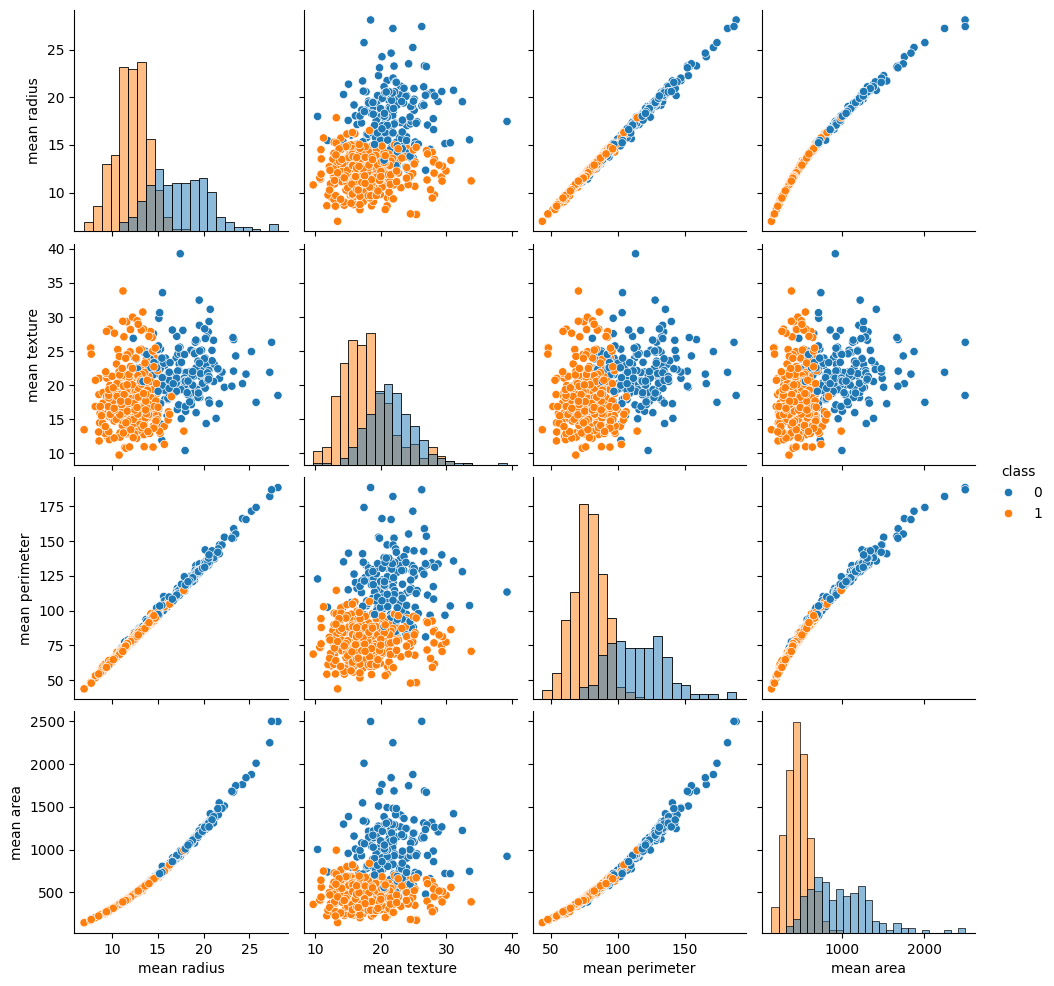

In [ ]:
sns.pairplot(df_cancer, hue='class', diag_kind='hist')
plt.show()

### **Análise de Correlação com Heatmap**

É calculada e exibida uma matriz de correlação entre as variáveis selecionadas. Um `heatmap` é utilizado para visualizar essa matriz, onde os valores de correlação são representados por cores. A anotação dos valores (`annot=True`) e o mapa de cores (`cmap='coolwarm'`) facilitam a interpretação das relações lineares entre as características, indicando quão fortemente elas estão relacionadas entre si.

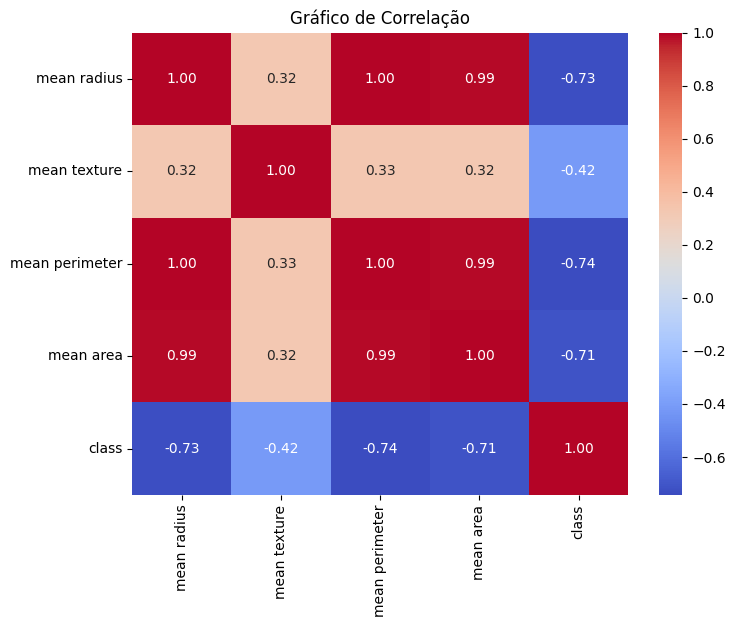

In [ ]:
correlation_matrix = df_cancer.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de Correlação')
plt.show()

### **Divisão dos Dados em Conjuntos de Treino e Teste**

Nesta seção, as variáveis independentes (características) e a variável dependente (alvo) são separadas. O conjunto de dados é então dividido em dois subconjuntos: um para treino (75% dos dados) e outro para teste (25% dos dados), utilizando a função `train_test_split` da Scikit-learn. O `random_state` é definido para garantir a reprodutibilidade da divisão.

In [ ]:
x = df_cancer.drop('class', axis=1)
y = df_cancer['class']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=42)

### **Normalização dos Dados**

Os dados são normalizados usando `StandardScaler` para padronizar as características, garantindo que todas tenham média zero e desvio padrão um. Isso é importante para que os modelos de Machine Learning não deem peso indevido a características com maiores escalas. Os dados de treino são ajustados (`fit`) e transformados (`transform`), e os dados de teste são apenas transformados, usando os parâmetros aprendidos no conjunto de treino. Os DataFrames normalizados são então exibidos.

In [ ]:
scaler = StandardScaler()
x_treino_norm = scaler.fit_transform(x_treino)
x_teste_norm = scaler.transform(x_teste)
x_treino_norm_df = pd.DataFrame(x_treino_norm, columns=x_treino.columns)
x_teste_norm_df = pd.DataFrame(x_teste_norm, columns=x_teste.columns)

### **Treinamento do Modelo Random Forest**

Nesta etapa, um modelo de classificação `RandomForestClassifier` é inicializado com 100 estimadores e um `random_state` para reprodutibilidade. O modelo é então treinado usando os dados de treino normalizados (`x_treino_norm`) e seus rótulos (`y_treino`). Após o treinamento, as previsões são feitas no conjunto de teste normalizado (`x_teste_norm`).

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_treino_norm, y_treino)
y_pred_rf = rf_classifier.predict(x_teste_norm)

### **Acurácia do Modelo Random Forest**

A acurácia do modelo Random Forest é calculada e exibida. A acurácia mede a proporção de previsões corretas em relação ao total de previsões realizadas.

In [ ]:
print(f"Acurácia: {accuracy_score(y_teste, y_pred_rf)}")

Acurácia: 0.9370629370629371


### **Treinamento do Modelo SVC (Support Vector Classifier)**

Um modelo de classificação `SVC` é inicializado com um kernel linear e um `random_state` para reprodutibilidade. O modelo é treinado usando os dados de treino normalizados (`x_treino_norm`) e seus rótulos (`y_treino`). Após o treinamento, as previsões são realizadas no conjunto de teste normalizado (`x_teste_norm`).

In [ ]:
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(x_treino_norm, y_treino)
y_pred_svc = svc_classifier.predict(x_teste_norm)

### **Acurácia do Modelo SVC**

A acurácia do modelo Support Vector Classifier (SVC) é calculada e exibida, fornecendo uma métrica clara do desempenho do modelo nas previsões.

In [ ]:
print(f"Acurácia: {accuracy_score(y_teste, y_pred_svc)}")

Acurácia: 0.9090909090909091


### **Matriz de Confusão do Modelo Random Forest**

É gerada e exibida a Matriz de Confusão para o modelo Random Forest, utilizando as previsões (`y_pred_rf`) e os rótulos verdadeiros (`y_teste`). Os rótulos `Maligno` e `Benigno` são usados para facilitar a interpretação. A matriz de confusão ajuda a visualizar o desempenho do classificador, mostrando os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

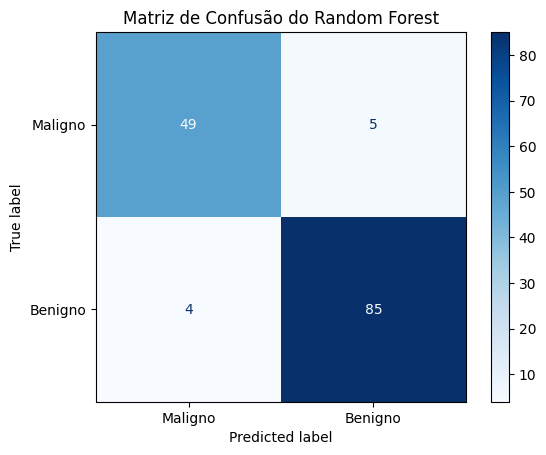

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_teste, y_pred_rf,
    display_labels=['Maligno', 'Benigno'],
    cmap='Blues'
)
plt.title('Matriz de Confusão do Random Forest')
plt.show()

### **Matriz de Confusão do Modelo SVC**

De forma similar ao Random Forest, é gerada e exibida a Matriz de Confusão para o modelo SVC, utilizando as previsões (`y_pred_svc`) e os rótulos verdadeiros (`y_teste`). Os rótulos `Maligno` e `Benigno` são usados para facilitar a interpretação, fornecendo uma visão clara do desempenho do classificador SVC.

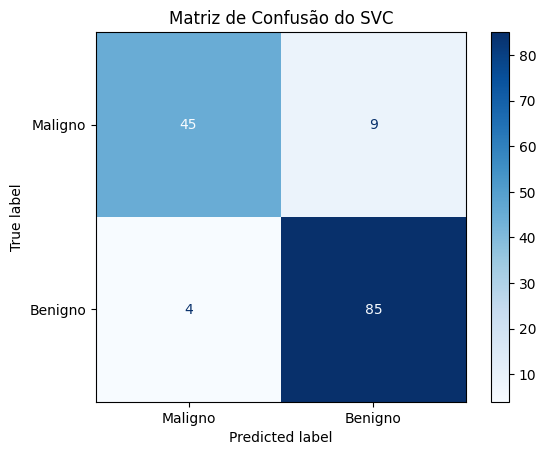

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_teste, y_pred_svc,
    display_labels=['Maligno', 'Benigno'],
    cmap='Blues'
)
plt.title('Matriz de Confusão do SVC')
plt.show()

### **Conclusão**

Neste projeto, implementamos e avaliamos dois modelos de Machine Learning (Random Forest e Support Vector Classifier - SVC) para a classificação de tumores (malignos ou benignos) utilizando um subconjunto do dataset Breast Cancer Wisconsin. As principais conclusões e insights são:

1.  **Seleção de Características**: Iniciamos com a seleção de quatro características principais (`mean radius`, `mean texture`, `mean perimeter`, `mean area`) que demonstraram alta correlação entre si e com a variável alvo (`class`). Isso foi visualizado através do `pairplot` e do `heatmap` de correlação, que indicaram a capacidade dessas características em diferenciar as classes.

2.  **Preparação dos Dados**: Os dados foram divididos em conjuntos de treino e teste, e subsequentemente normalizados usando `StandardScaler`. A normalização é crucial para modelos baseados em distância, como o SVC, e pode melhorar o desempenho de modelos como o Random Forest, ao garantir que todas as características contribuam de forma equitativa para o treinamento.

3.  **Desempenho dos Modelos**:
    *   **Random Forest**: O modelo Random Forest obteve uma acurácia de aproximadamente **0.937 (93.7%)**. Sua matriz de confusão mostrou um bom equilíbrio entre a identificação correta de tumores malignos e benignos, com poucos falsos positivos e falsos negativos.
    *   **SVC (Kernel Linear)**: O modelo SVC com kernel linear alcançou uma acurácia de aproximadamente **0.909 (90.9%)**. Embora ligeiramente inferior ao Random Forest neste conjunto de dados específico, ainda demonstrou um bom poder preditivo, como evidenciado por sua matriz de confusão.

4.  **Insights sobre as Matrizes de Confusão**:
    *   Ambos os modelos apresentaram um desempenho robusto na classificação. A análise das matrizes de confusão permite entender os tipos de erros que cada modelo comete. No caso do Random Forest, a acurácia mais alta sugere que ele foi ligeiramente mais eficaz em minimizar os erros de classificação em comparação com o SVC para este problema e conjunto de características.

Em resumo, o modelo Random Forest demonstrou ser o mais eficaz para este problema de classificação de tumores com as características selecionadas, apresentando uma acurácia superior. Este estudo ressalta a importância da seleção de características, pré-processamento de dados e avaliação comparativa de modelos para alcançar resultados preditivos ótimos em tarefas de classificação.